In [14]:
def read_quijote(filepath, cosm, snapnum, axis, space):
    """
    Returns array with Halo positions in Mpc/h
    """
    import numpy as np
    import readgadget
    import readfof
    import redshift_space_library as RSL

    #-----------
    # Read data from Quijote
    #-----------

    # get the name of the corresponding snapshot
    snapshot = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Snapshots/%s/0/snapdir_%03d/snap_%03d'%(cosm,snapnum,snapnum)
    
    # read the redshift, boxsize, cosmology...etc in the header
    header   = readgadget.header(snapshot)
    BoxSize  = header.boxsize/1e3  #Mpc/h
    #Nall     = header.nall         #Total number of particles
    Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
    Omega_m  = header.omega_m      #value of Omega_m
    Omega_l  = header.omega_l      #value of Omega_l
    h        = header.hubble       #value of h
    redshift = header.redshift     #redshift of the snapshot
    Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l) #Value of H(z) in km/s/(Mpc/h)

    print(f'BoxSize = {BoxSize} Mpc/h')
    #print('Number of particles in the snapshot:',Nall)
    print(f'Omega_m = {Omega_m}')
    #print('Omega_l = %.3f'%Omega_l)
    print(f'h = {h}')
    print(f'redshift = {redshift:.1f}')
    #print(f'Omega_b = {header.omega_b}')
    #print(f'sigma_8 = {header.sigma_8}')
    #print(f'ns = {header.ns}')

    # read the halo catalogue
    #path = dir+'/'+cosm+'/'+simnum
    FoF = readfof.FoF_catalog(filepath, snapnum, long_ids=False,
                            swap=False, SFR=False, read_IDs=False)
    pos_h  = FoF.GroupPos/1e3            #Halo positions in Mpc/h
    vel_h  = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s
    mass_h = FoF.GroupMass*1e10          #Halo masses in Msun/h

    if space == 'zspace':
    	RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

    return pos_h, vel_h, mass_h, BoxSize  #Halo positions in Mpc/h

filepath = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/1'
cosm = 'fiducial'

pos, vel, mass, boxsize = read_quijote(filepath, cosm, 4, 0, 'zspace')

BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0


In [15]:
mass

array([3.9557886e+15, 2.9716014e+15, 2.9177635e+15, ..., 1.3131219e+13,
       1.3131219e+13, 1.3131219e+13], dtype=float32)

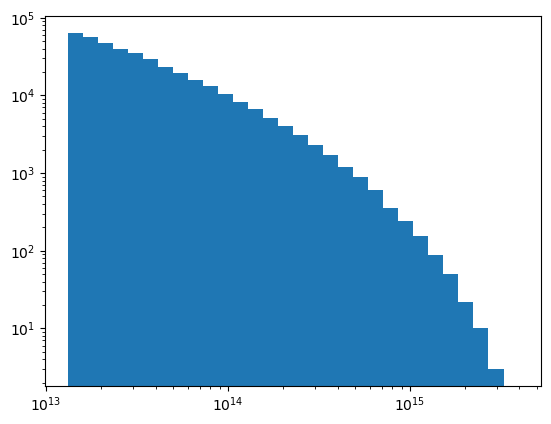

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')
  plt.yscale('log')

plot_loghist(mass, 30)